# Breast-Cancer-Wisconsin Data Description:

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. 

Number of Instances: 699. Missing attribute values: 16

Number of Attributes: 10 plus the class attribute as shown below

```
1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                      1 - 10
11. Class:                       (2 for benign, 4 for malignant)
```
  
**Question:** Develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

**Results:**

In [388]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

In [389]:
# Since the dataset has not column names. I am creating a list of column names based on the attributes (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
columns = ["id", "clump_thickness", "cell_size", "cell_shape", "marginal_adhesion", "epithelial_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class"]

In [390]:
# Load the data
data = pd.read_csv("breast-cancer-wisconsin.data.csv", names=columns)

In [391]:
data.head()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [412]:
data.shape

(699, 11)

In [413]:
# Check for duplicates
data[data['id'].duplicated()].shape

(54, 11)

In [406]:
data[data['id'] == 1033078]

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [407]:
data[data['id'] == 1070935]

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
29,1070935,1,1,3,1,2,1,1,1,1,2
30,1070935,3,1,1,1,1,1,2,1,1,2


In [418]:
data['id'].drop_duplicates()

0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
5      1017122
6      1018099
7      1018561
8      1033078
10     1035283
        ...   
686     536708
687     566346
688     603148
689     654546
692     714039
693     763235
694     776715
695     841769
696     888820
697     897471
Name: id, Length: 645, dtype: int64

In [316]:
data.describe()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


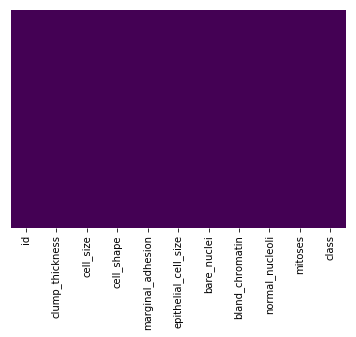

In [317]:
# Check missing values visually
sns.heatmap(data = data.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [318]:
# Check the missing values (na's)
data.isna().sum()
# data.isnull().sum()

id                      0
clump_thickness         0
cell_size               0
cell_shape              0
marginal_adhesion       0
epithelial_cell_size    0
bare_nuclei             0
bland_chromatin         0
normal_nucleoli         0
mitoses                 0
class                   0
dtype: int64

In [319]:
# Change labels from 2 and 4 to 0 and 1 respectively
labels = {2: 0, 4: 1}
data["class"] = data["class"].apply(lambda x: labels[x])

In [320]:
data.head()
data.tail()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1
698,897471,4,8,8,5,4,5,10,4,1,1


In [321]:
data.dtypes

id                       int64
clump_thickness          int64
cell_size                int64
cell_shape               int64
marginal_adhesion        int64
epithelial_cell_size     int64
bare_nuclei             object
bland_chromatin          int64
normal_nucleoli          int64
mitoses                  int64
class                    int64
dtype: object

In [322]:
# Replace '?' with na's
data["bare_nuclei"] = data["bare_nuclei"].replace('?', np.nan)

In [323]:
# Check the na's
data["bare_nuclei"].isna().sum()

16

In [324]:
# Fill na's with median
data["bare_nuclei"] = data["bare_nuclei"].fillna(data["bare_nuclei"].median())

In [325]:
data.dtypes

id                       int64
clump_thickness          int64
cell_size                int64
cell_shape               int64
marginal_adhesion        int64
epithelial_cell_size     int64
bare_nuclei             object
bland_chromatin          int64
normal_nucleoli          int64
mitoses                  int64
class                    int64
dtype: object

In [326]:
# Convert object type to integer
data['bare_nuclei'] = data['bare_nuclei'].astype('int64')

In [327]:
data.dtypes

id                      int64
clump_thickness         int64
cell_size               int64
cell_shape              int64
marginal_adhesion       int64
epithelial_cell_size    int64
bare_nuclei             int64
bland_chromatin         int64
normal_nucleoli         int64
mitoses                 int64
class                   int64
dtype: object

In [328]:
# Check the na's
data["bare_nuclei"].isna().sum()

0

In [329]:
# Counts for each class
data["class"].value_counts()

0    458
1    241
Name: class, dtype: int64

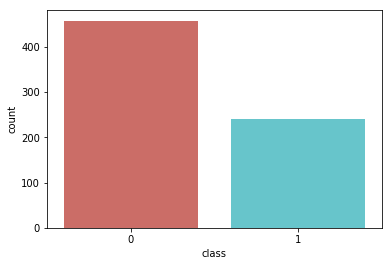

In [330]:
# Counts plot for the classes
sns.countplot(x = "class", data = data, palette='hls');

In [331]:
class_0 = len(data[data['class'] == 0])
class_1 = len(data[data['class'] == 1])
class_0_pct = class_0/(class_0+class_1) * 100
class_1_pct = class_1/(class_0+class_1) * 100
print("Perecentage of Benign class:", class_0_pct)
print("Perecentage of Benign class:", class_1_pct)

Perecentage of Benign class: 65.52217453505007
Perecentage of Benign class: 34.47782546494993


Our classes are imbalanced, and the ratio of benign to malignant instances is 65:34. Before we go ahead to balance the classes, let’s do some more exploration.

In [332]:
# Groupby class
data.groupby('class').mean()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,,
0,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,1.336245,2.100437,1.290393,1.063319
1,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,7.572614,5.979253,5.863071,2.589212


## Check the prediction power of each feature

In [333]:
def plot_feature_predict(feature, title):
    table = pd.crosstab(data[feature], data['class'])
#     return table.head()
    table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True);
    plt.title(title + " for cancer type");
    plt.show()

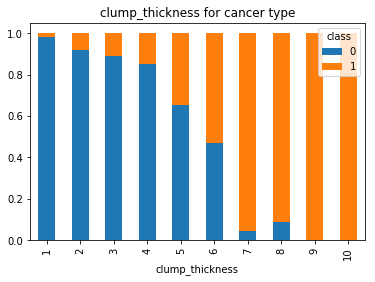

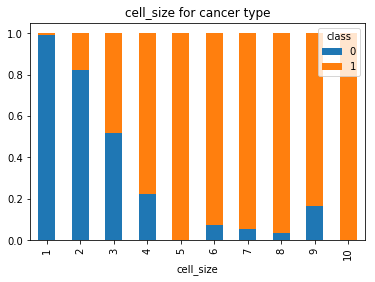

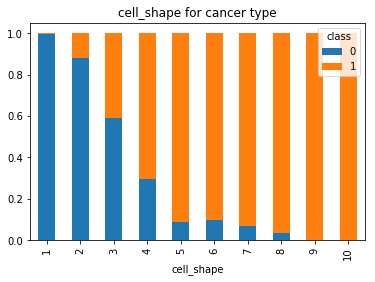

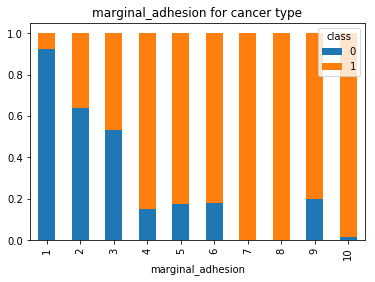

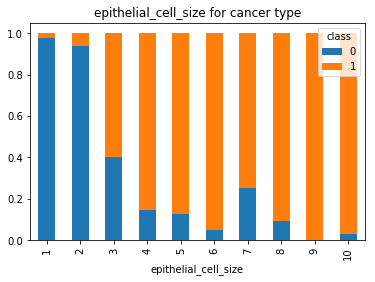

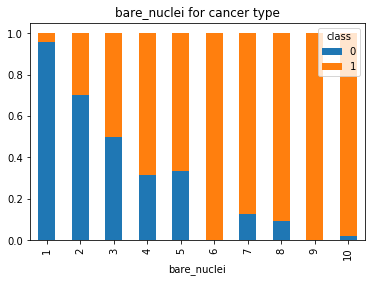

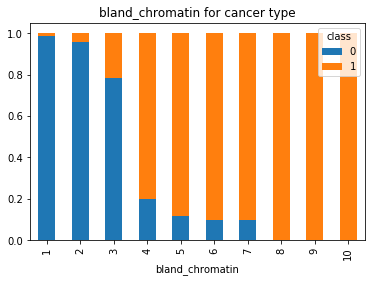

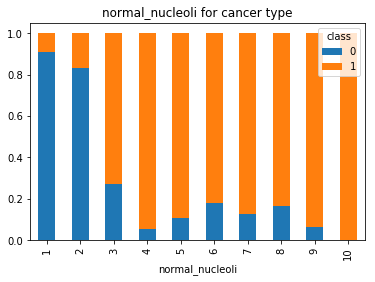

In [334]:
int_columns = list(data.columns[1:9])
for i in int_columns:
    title = str(i)
    plot_feature_predict(feature=title, title=title)

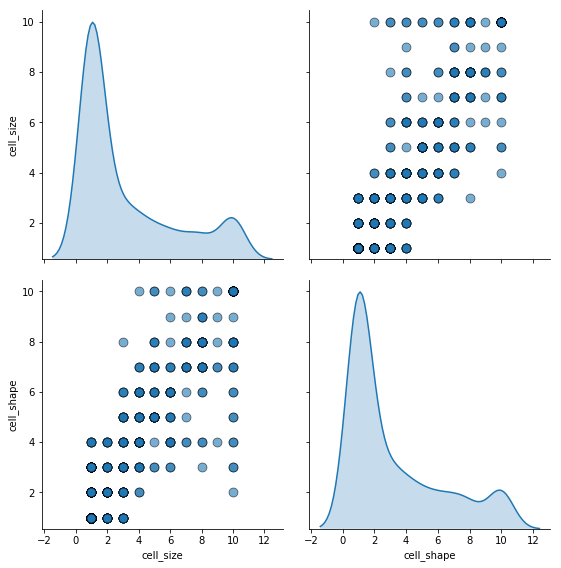

In [335]:
sns.pairplot(data[int_columns], vars = ["cell_size", "cell_shape"], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

In [336]:
# countries = np.random.choice(list("ABCDE"),size=25)
# df = pd.DataFrame({"Date" : range(200),
#                     'Country' : np.repeat(countries,8),
#                     'y1' : np.random.rand(200),
#                     'y2' : np.random.rand(200)})

# fig = plt.figure()

# for c,num in zip(countries, xrange(1,26)):
#     df0=df[df['Country']==c]
#     ax = fig.add_subplot(5,5,num)
#     ax.plot(df0['Date'], df0[['y1','y2']])
#     ax.set_title(c)

# plt.tight_layout()
# plt.show()

## Logistic Regression

In [372]:
X = data.drop(["id", "class"], axis = 1)

In [373]:
X.head()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [374]:
y = data["class"]

In [375]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [377]:
X_train.head()
X_train.shape
X_test.head()
X_test.shape

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
82,5,2,1,1,2,1,3,1,1
51,5,3,3,4,2,4,3,4,1
220,1,1,1,2,2,1,3,1,1
559,5,1,1,1,2,1,2,1,1
544,2,1,3,2,2,1,2,1,1


(559, 9)

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
158,1,1,2,1,3,1,1,1,1
499,4,1,1,1,2,1,2,1,1
396,3,1,1,1,2,1,3,1,1
155,5,5,5,6,3,10,3,1,1
321,3,1,1,1,2,1,3,1,1


(140, 9)

In [378]:
y_train.head()
y_train.shape
y_test.head()
y_test.shape

82     0
51     1
220    0
559    0
544    0
Name: class, dtype: int64

(559,)

158    0
499    0
396    0
155    1
321    0
Name: class, dtype: int64

(140,)

In [379]:
model = LogisticRegression()

In [380]:
model.fit(X_train, y_train)

/Users/upendra_35/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [381]:
y_pred = model.predict(X_test)

In [382]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

In [383]:
cnf_matrix

array([[94,  1],
       [ 3, 42]])

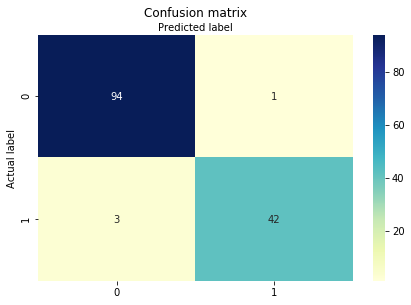

In [384]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g');
ax.xaxis.set_label_position("top");
plt.tight_layout();
plt.title('Confusion matrix', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [385]:
print("Accuracy score", round(accuracy_score(y_test, y_pred) * 100, 3))
print("Precision score", round(precision_score(y_test, y_pred) * 100, 3))
print("Recall score", round(recall_score(y_test, y_pred) * 100, 3))

Accuracy score 97.143
Precision score 97.674
Recall score 93.333


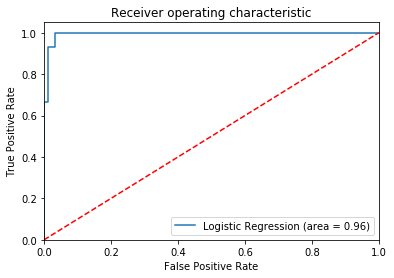

In [386]:
# ROC curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure();
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc);
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Receiver operating characteristic');
plt.legend(loc="lower right");

In [387]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

